In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sys
from matplotlib import cm
from sklearn.linear_model import LinearRegression
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]
sns.set_style('darkgrid')

%matplotlib inline

Fat tail, Survivorship bias and Fake Exponential Growth

Nassim Taleb warns us of the dangers in misapplying linear statistical methods (e.g. regression, correlation) to compare a fat-tailed variable (e.g. wealth, income) to a thin-tailed one (e.g. IQ test scores). [add reference of his book Statistical Consequences of Fat Tails]. The fat tails — where the extremes lie and the outliers that shape our world reside — defy conventional analysis and prediction.
While people in finance likes linear method and tends to ignore the tails ---- "let's winsorize the stock returns and compute the covariance!" (note: winsorizing is a fancy word of assuming historical financial crsises do not exist), many people may do the reverse: focusing too much on the tails --- a survivorship bias --- which create a fake non-linearity. 

Let me explain this via the classic IQ - wealth data. The following scatter plot compares the reported personal wealth to their IQ test scores. The wealth distribution is well-known to follow the famous Pareto distribution, while the IQ score by design, follows a bell-shaped Gaussian distribution (see their histograms). 

[Figure here]

The survivorship bias suggest that people tends to focus on the top performers while overlook the rest. In this diagram, the red dots are the ones with top 1% wealth in each IQ score group (50-60, 60-70, etc). These data points forms a non-linear fast growing curve, an exponential curve, comparing to the more flattened blue curve, which is also an expnoential curve, but fitted by all data points. 

While overemphasising the negative tail (e.g. financial risk) can be benefitial, overemphasising the positive ones is not very helpful. Considering the x-axis to be something else than IQ, for example, the number of advices you took from all the best selling personal growth books claiming studied most successful individuals, such as waking up 5am in the morning, reading X books per year, etc. Taking some of them can be beneficial, but unlikely make you as rich as the top outliers in the wealth distribution. Then someone would tell you that's not enough, you need to be consistent and patient, as the compound growth is slow in the begining, as you keep adding more stakes, your payoff will soon sky rocketed. I agree that the personal growth is indeed non-linear and compound, the actual growth rate may not as high as you expected, as the most "ordinary" data points are ignored.

[Quote something blogs]

Same for investment. Learning some basic financail knowledge and start to invest is better than just puting all the money in the bank or buying something you do not actually need. But going further on the right side of the x-axis, i.e. reading all financial news, drawing a web of technical indicators on your stock chart, day trading with options, may not add your stakes of success, even you see some people getting rich from that. 

Another example is the career choice. You may be told that you should taking "leveraged" jobs (e.g. author, youtuber, tech startups) which have much higher potential than ordinary fixed salary jobs. What is not often mentioned is that these careers also tend to be winner-take-all, therefore generates highly fat-tailed (classical Pareto 20-80 or even more extreme) income distribution, in other words, more hiden failed data points. Starting these as a secondary job can help you unlock the high potential gain. But all in to the right of the x-axis may not make these high potential gain more deterministic. 

Rob Copeland, the author of "The Fund: Ray Dalio, Bridgewater Associates, and the Unraveling of a Wall Street Legend" told an interesting story that Ray Dailo wanted to use personality tests to find successful people found that many employees in Bridge Water had the same result as himself. That's what would happen when you try to predict a fat-tailed variable using a thin tailed one. The "solution" was to add more and more rules aka principles until you overfit the single outlier, Ray himself. Many principles are indeed insightful and helpful to personal success. But adding more than 200 of them (according to Rob) lies too far on the right of the x-axis, which did not improve Bridgewater's performance exponentially. 









Fat Tails, Survivorship Bias, and the Illusion of Exponential Growth

Nassim Taleb warns us of the dangers in misapplying linear statistical methods (e.g. regression, correlation) to compare a fat-tailed variable (e.g. wealth, income) to a thin-tailed one (e.g. IQ test scores) in his book "Statistical Consequences of Fat Tails". The fat tails — where the extremes lie and the outliers that shape our world reside — defy conventional analysis and prediction. While professionals in finance likes linear method and sometimes tends to pretend like financial crises are outliers that can be edited out in their risk models, a process known as 'winsorizing'. In other realms, however, there is a tendency to focus too heavily on these extremes due to survivorship bias, creating a false narrative of non-linear, exponential success.

Consider the following scatter plot comparing people's wealth to their IQ scores. The wealth distribution, which follows a fat-tailed Pareto distribution, is contrasted with the IQ scores, which is normally distributed by design, as in the bell-shaped histograms under the scatter plot. 

[Insert Figure]

Survivorship bias tends to spotlight the top achievers, the red dots representing the top 1% of wealth in each IQ category, crafting a misleadingly steep, exponential growth curve. This curve sharply contrasts with the more modest blue curve, which is also dervied from an exponential regression, but accounts for the entire dataset.

While overemphasising the negative tail (e.g. financial risk) can be benefitial, emphasizing the success stories, the 'positive tail,' can skew our perceptions. For instance, if we substitute IQ with the number of personal development strategies adopted from bestselling books, the principle holds. These strategies, such as early rising, voracious reading habits or rigorous self-discipline, gleaned from studying the ultra-successful, may not translate to wealth for the average person. Yet, we're often told that persistence and patience will lead to a compound growth payoff: slow in the begining, then skyrockets to capture the top outliers and neglects the 'ordinary' data points.





In [11]:
# IQ income data 
iq_income = pd.read_csv('../data/wls_iq_income.csv')
iq_income = iq_income.sort_values(['ghnrs_j', 'z_ar025rpc']).reset_index(drop=True)
x_grid = np.arange(iq_income['ghnrs_j'].min(), iq_income['ghnrs_j'].max())

In [12]:

# bias_index = iq_income.rolling(100, min_periods=1).apply(lambda s: s.idxmax())['z_ar025rpc'].unique()

In [14]:
bias_index = []
for x_max in x_grid:
    x_min = x_grid[x_grid<=x_max][-10:][0]
    df = iq_income.loc[(iq_income['ghnrs_j']>=x_min)&(iq_income['ghnrs_j']<=x_max)]
    if df.shape[0]>0:
        bias_index+= df.index[df['z_ar025rpc']>=df['z_ar025rpc'].quantile(0.99)].to_list()
bias_index = sorted(set(bias_index))

In [9]:
model = LinearRegression().fit(X=iq_income[['ghnrs_j']], y=np.log(iq_income['z_ar025rpc']))
model_biased = LinearRegression().fit(X=iq_income.loc[bias_index, ['ghnrs_j']], y=np.log(iq_income.loc[bias_index, 'z_ar025rpc']))

y_pred = model.predict(x_grid.reshape((len(x_grid), 1)))
y_pred_biased = model_biased.predict(x_grid.reshape((len(x_grid), 1)))

C:\Users\soars\anaconda3\envs\research\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\soars\anaconda3\envs\research\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'Reported net worth')

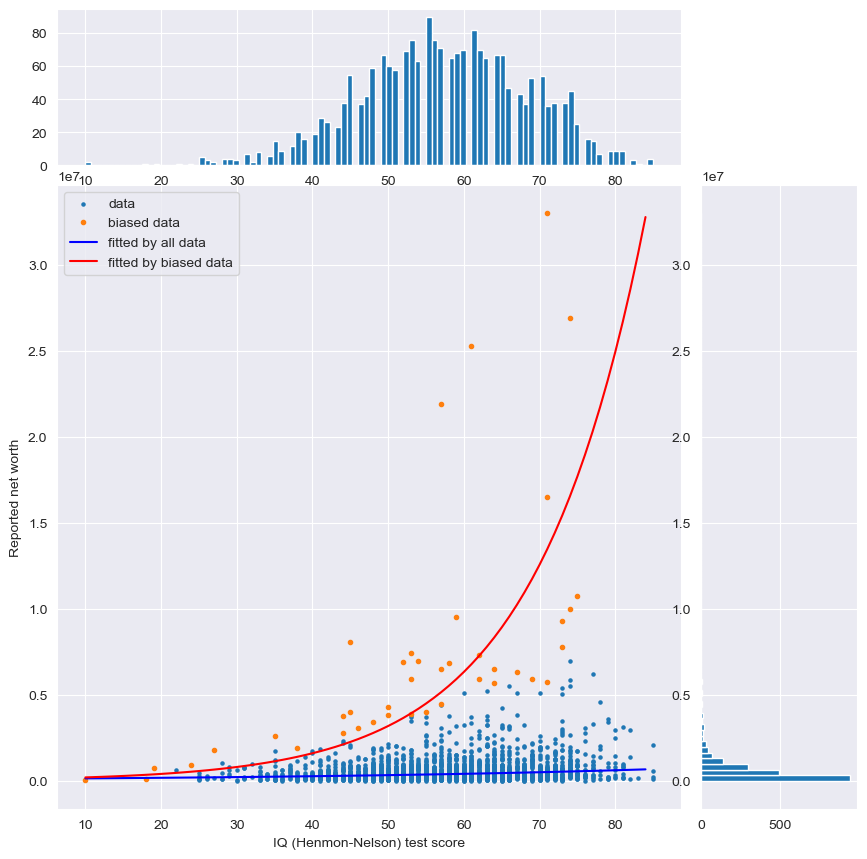

In [49]:
# Generate scatter-histogram plot
fig = plt.figure(figsize=(10, 10))
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)

ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)

ax.scatter(iq_income['ghnrs_j'], iq_income['z_ar025rpc'], c=colors[0], s=5.0, label='data')
ax.plot(iq_income.loc[bias_index, 'ghnrs_j'], iq_income.loc[bias_index, 'z_ar025rpc'], '.', c=colors[1], label='biased data')
ax_histx.hist(iq_income['ghnrs_j'], bins=100)
ax_histy.hist(iq_income['z_ar025rpc'], bins=100, orientation='horizontal')

ylim = ax.get_ylim()
ax.plot(x_grid, np.exp(y_pred), 'b-', label='fitted by all data')
ax.plot(x_grid, np.exp(y_pred_biased), 'r-', label='fitted by biased data')
ax.set_ylim(ylim)
# ax.set_ylim([-5e5, 5e6])
ax.legend()
ax.set_xlabel("IQ (Henmon-Nelson) test score")
ax.set_ylabel("Reported net worth")

In [23]:
from scipy.stats import pareto

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pareto

# Define the range of alpha values
alphas = np.linspace(0.5, 5, 1000)

# Initialize lists to store the 90% quantiles and means
quantiles_90 = []
means = []

# Calculate the 90% quantile and mean for each alpha value
df = pd.DataFrame(index=alphas)
for alpha in alphas:
    # Create a Pareto distribution with the given alpha and scale parameter = 1
    dist = pareto(b=alpha, scale=1)
    
    # Calculate the 90% quantile
    for q in [0.5, 0.9, 0.95, 0.99]:
        df.loc[alpha, f'{q:.0%} quantile'] = dist.ppf(q)
 
    if alpha > 1:
        df.loc[alpha, 'mean'] = dist.mean()
    else:
        df.loc[alpha, 'mean'] = np.nan
df = df.sort_values('50% quantile')
df['x'] = np.log(df['50% quantile'])/0.01
df.index.name = 'alpha'
df = df.reset_index().set_index('x')

Text(0.5, 1.0, '50%, 95% and 99% quantiles of a Pareto distribution with scale 1, assuming the median = exp(0.01 * x)')

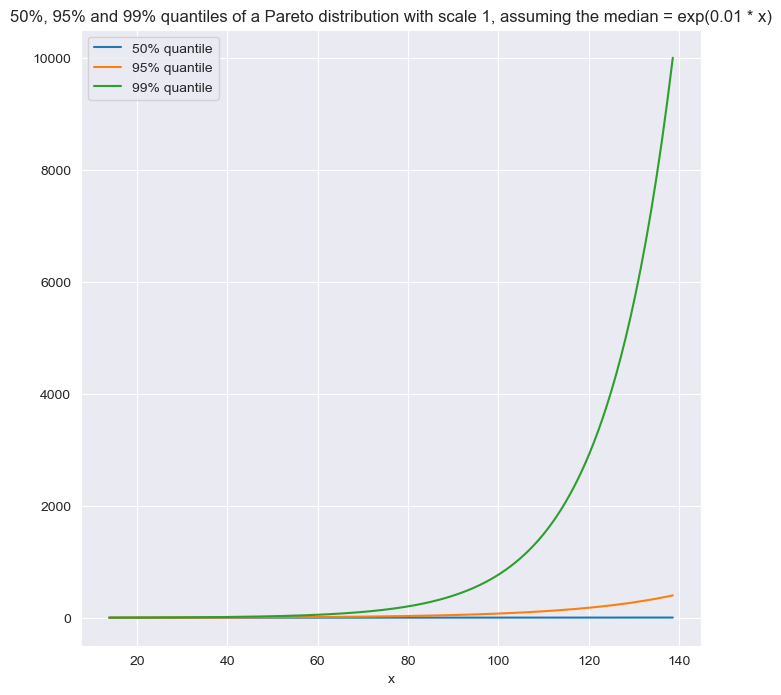

In [50]:
fig, ax = plt.subplots(figsize=(8, 8))
df[['50% quantile', '95% quantile', '99% quantile']].plot(ax=ax)
# ax.set_yticklabels([])
# ax.set_xticklabels([])
ax.set_title('50%, 95% and 99% quantiles of a Pareto distribution with scale 1, assuming the median = exp(0.01 * x)')

KeyError: "None of [Index(['50% quantile', '95% quantile', '99% quantile'], dtype='object')] are in the [columns]"

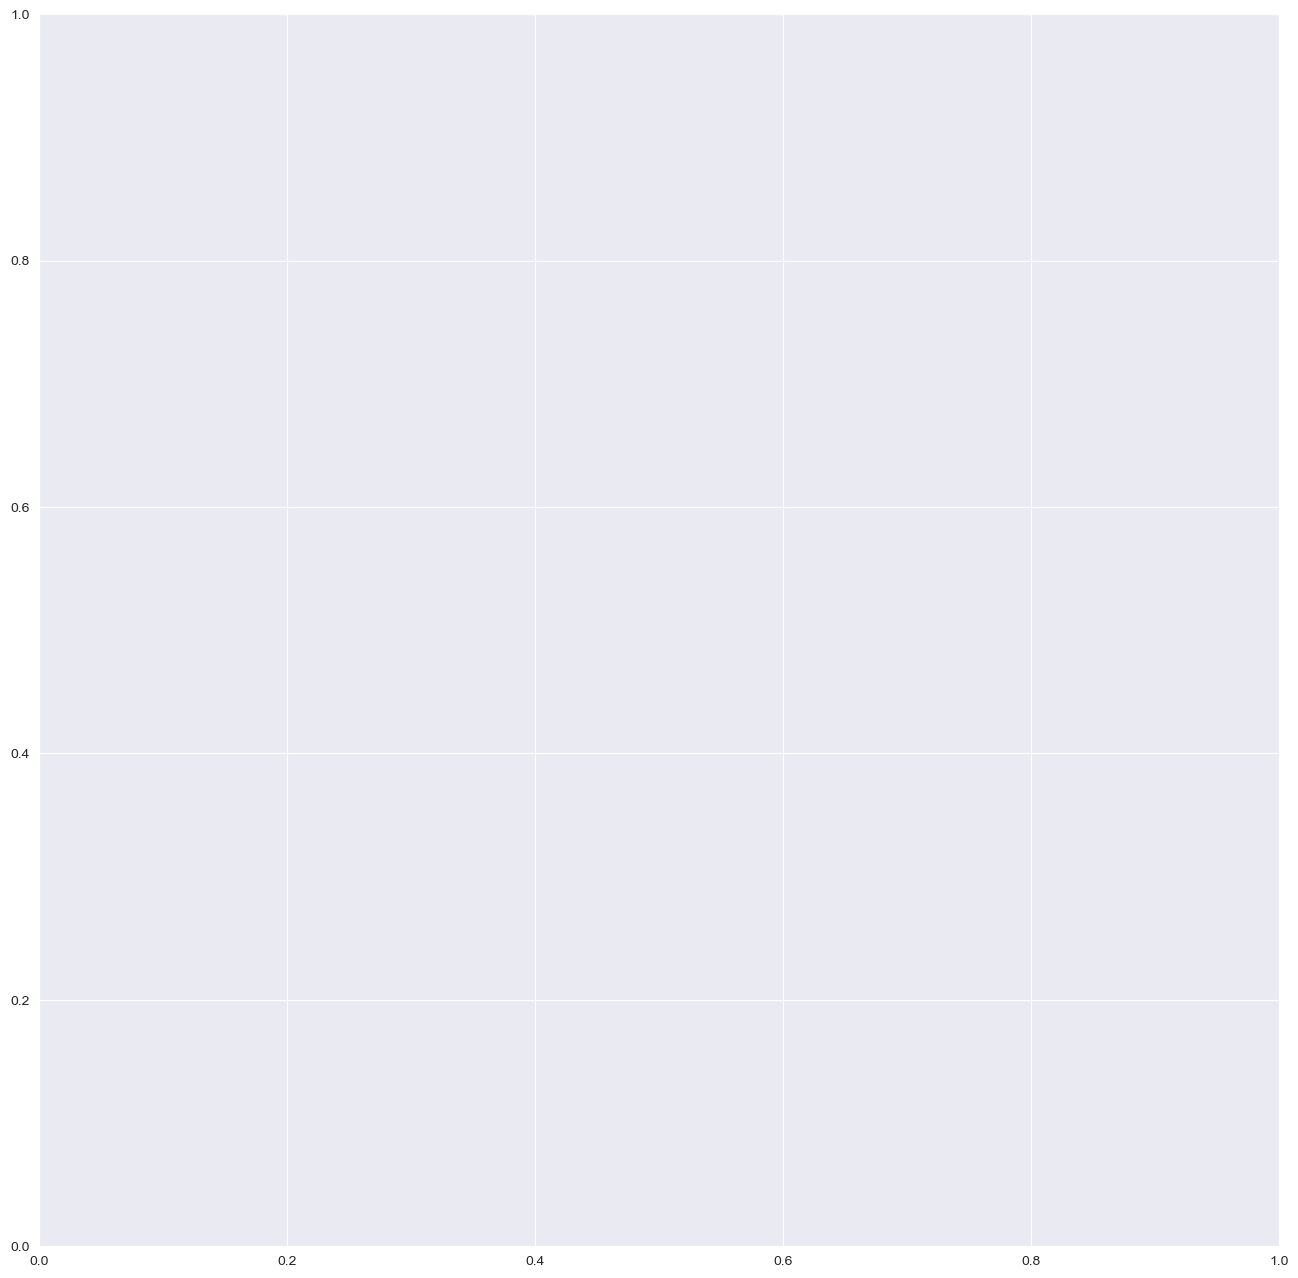

In [91]:
iq_income

,ghnrs_j,z_ar025rpc
0,10.0,64000.0
1,10.0,69000.0
2,18.0,120000.0
3,19.0,750000.0
4,22.0,635000.0
...,...,...
2118,83.0,149998.0
2119,85.0,95000.0
2120,85.0,214998.0
2121,85.0,600000.0


In [54]:
# Linear regression
y = iq_income['z_ar025rpc'].values
x = iq_income['ghnrs_j'].values
x = sm.add_constant(x)  # adding a constant

model = sm.OLS(np.log(y), x).fit()
alpha, beta = model.params
display(model.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     84.39
Date:                Fri, 10 Nov 2023   Prob (F-statistic):           9.39e-20
Time:                        21:36:41   Log-Likelihood:                -3264.9
No. Observations:                2123   AIC:                             6534.
Df Residuals:                    2121   BIC:                             6545.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.7135      0.129     90.937      0.000      11.461      11.966
x1             0.0203      0.002      9.186      0.000       0.016       0.025
==============================================================================
Omnibus:                      193.643   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              570.916
Skew:                          -0.473   Prob(JB):                    1.06e-124
Kurtosis:                       5.358   Cond. No.                         307.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [113]:
# Linear regression
y = iq_income.loc[idx, 'z_ar025rpc'].values
x = iq_income.loc[idx, 'ghnrs_j'].values
x = sm.add_constant(x)  # adding a constant

model = sm.OLS(np.log(y), x).fit()
alpha, beta = model.params
display(model.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     139.9
Date:                Fri, 10 Nov 2023   Prob (F-statistic):           2.32e-16
Time:                        22:01:06   Log-Likelihood:                -51.460
No. Observations:                  54   AIC:                             106.9
Df Residuals:                      52   BIC:                             110.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.5531      0.310     37.241      0.000      10.931      12.176
x1             0.0685      0.006     11.827      0.000       0.057       0.080
==============================================================================
Omnibus:                        1.412   Durbin-Watson:                   1.052
Prob(Omnibus):                  0.494   Jarque-Bera (JB):                1.335
Skew:                           0.261   Prob(JB):                        0.513
Kurtosis:                       2.434   Cond. No.                         191.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [114]:
# y = iq_income.loc[idx, 'z_ar025rpc'].values
# x = iq_income.loc[idx, 'ghnrs_j'].values
# model = np.poly1d(np.polyfit(x, y, 4))

Text(0, 0.5, 'log Net worth based on direct reports')

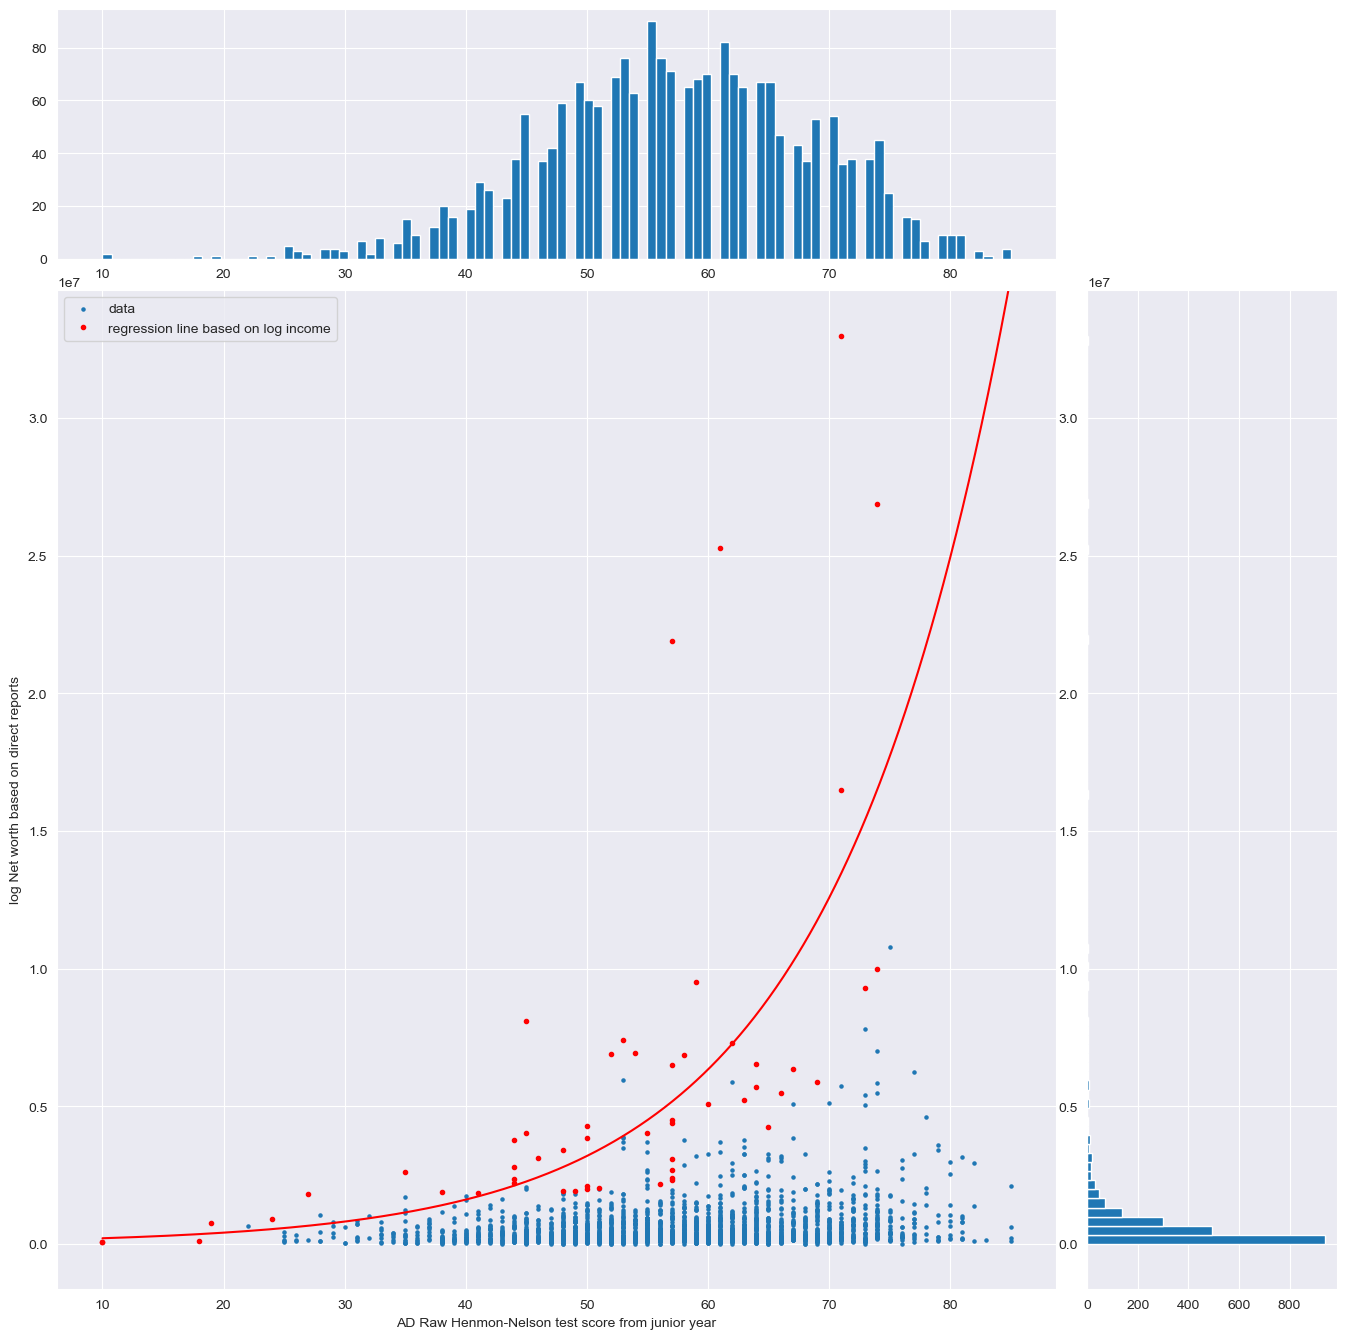

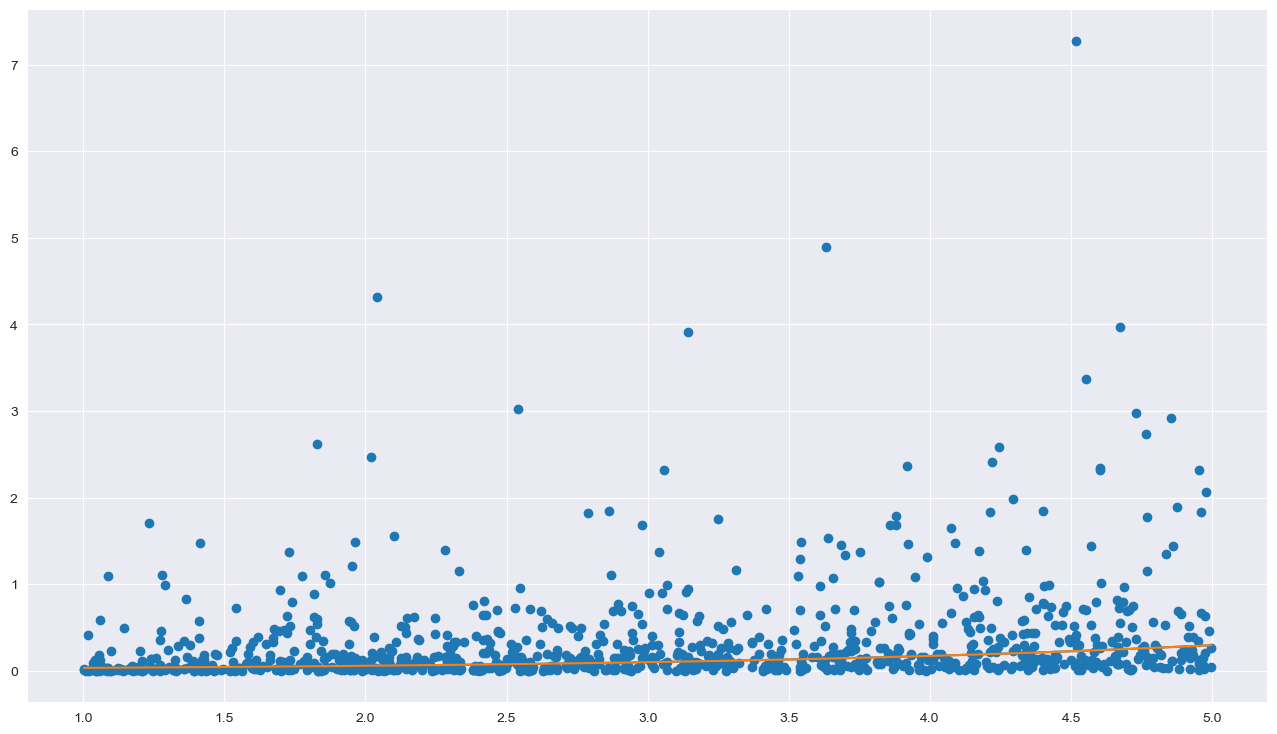

In [33]:
from scipy.stats import gamma, expon
from sklearn.linear_model import LinearRegression

# Number of samples
n_samples = 1000

# Generate x values from a normal distribution centered at 5 with std dev 1
# Truncate non-positive values
x = np.random.normal(5, 1, n_samples)
x = np.random.rand(n_samples) *4 + 1
x = x[x > 0]
x_grid = np.linspace(np.min(x), np.max(x), 1000)

# Generate y values from a Gamma distribution with alpha = x_i and beta = 1
y = gamma.rvs(a=0.5*x, scale=0.2)
z = expon.rvs(scale=y)

w_bias = np.ones(len(z))
w_bias[(x>6)&(z<3)] = 0
w_bias = w_bias / np.sum(w_bias)

# Perform linear regression
y_pred = LinearRegression().fit(X=np.reshape(x, (len(x), 1)), y=np.log(z)).predict(np.reshape(x_grid, (len(x_grid), 1)))
y_bias = LinearRegression().fit(X=np.reshape(x, (len(x), 1)), y=np.log(z), sample_weight=w_bias).predict(np.reshape(x_grid, (len(x_grid), 1)))

# Plot the original scatter plot
fig, ax = plt.subplots(figsize=(16, 9))
ax.scatter(x, z, label='Data points')


# Plot the regression line
ax.plot(x_grid, np.exp(y_pred), label='Regression Line')
ax.plot(x_grid, np.exp(y_bias), label='bias Regression Line')

In [ ]:
slope

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     84.39
Date:                Tue, 07 Nov 2023   Prob (F-statistic):           9.39e-20
Time:                        08:14:00   Log-Likelihood:                -3264.9
No. Observations:                2123   AIC:                             6534.
Df Residuals:                    2121   BIC:                             6545.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.7135      0.129     90.937      0.000      11.461      11.966
x1             0.0203      0.002      9.186      0.000       0.016       0.025
==============================================================================
Omnibus:                      193.643   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              570.916
Skew:                          -0.473   Prob(JB):                    1.06e-124
Kurtosis:                       5.358   Cond. No.                         307.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, 'log Net worth based on direct reports')

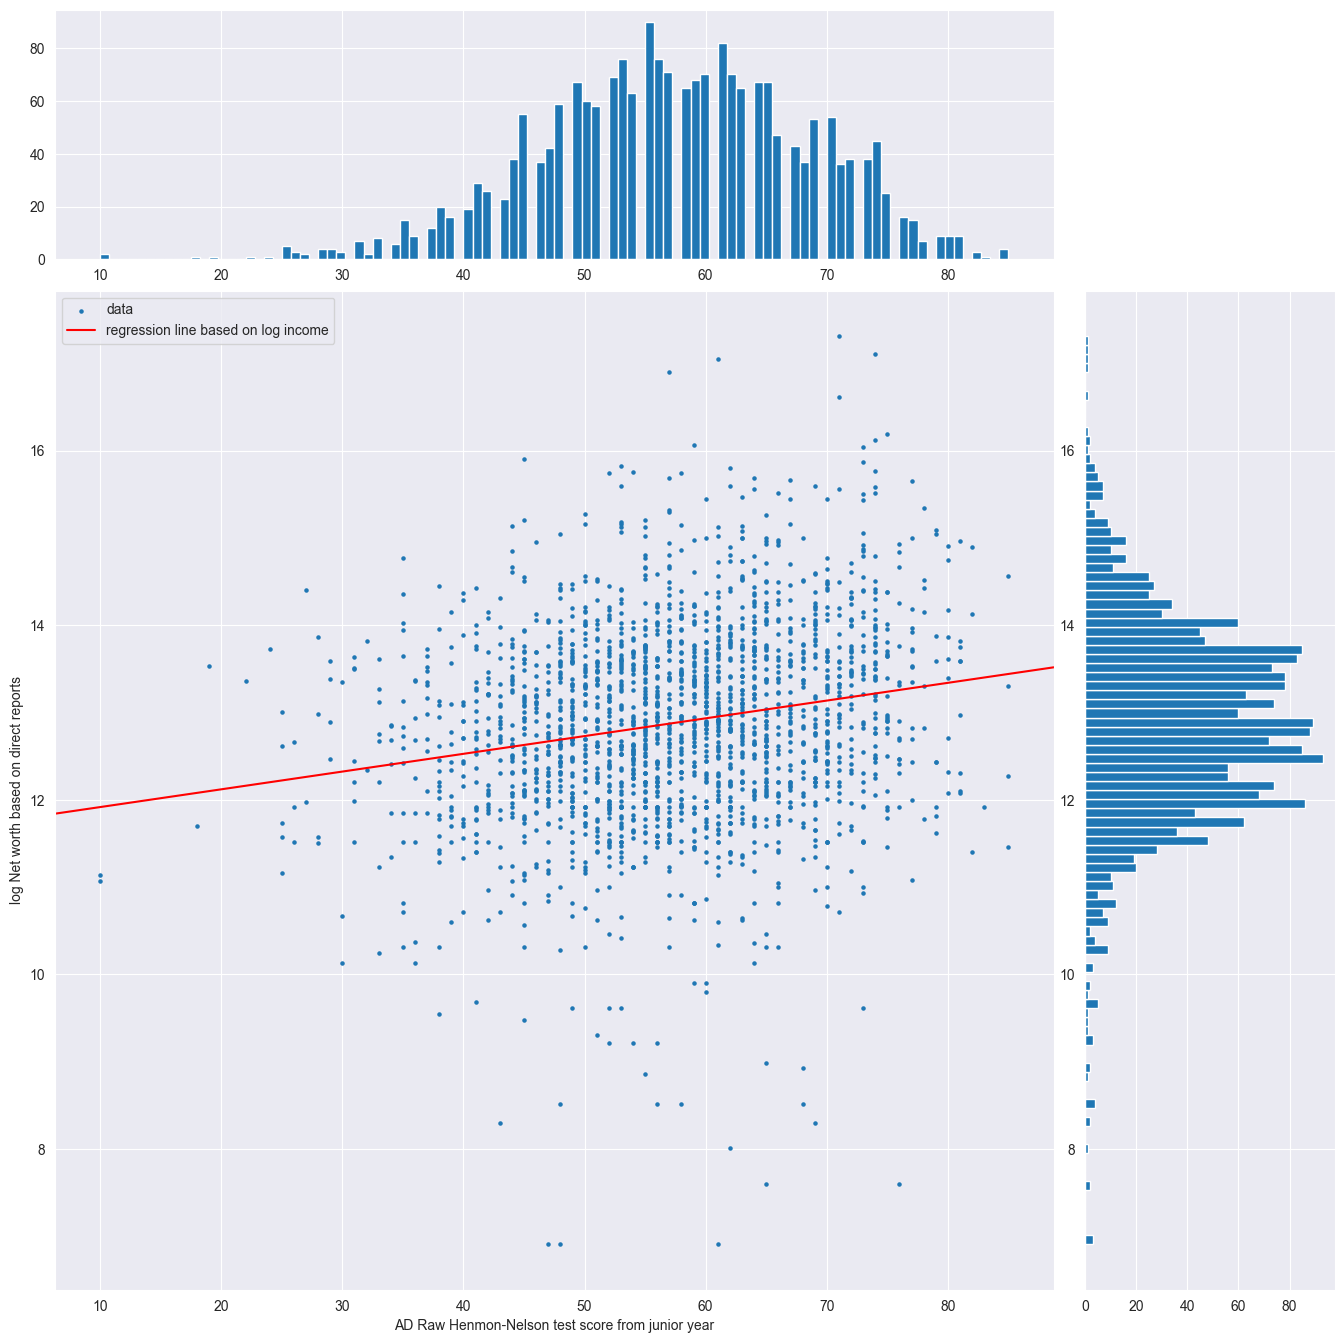

In [5]:

# Generate scatter-histogram plot
fig = plt.figure(figsize=(16, 16))
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)

ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)

ax.scatter(x[:,1], np.log(y), s=5.0)
ax_histx.hist(x[:,1], bins=100)
ax_histy.hist(np.log(y), bins=100, orientation='horizontal')

xlim = np.array(ax.get_xlim())
ax.plot(xlim, alpha + beta * xlim, 'r-')
ax.set_xlim(xlim)
# ax.set_ylim([-5e5, 5e6])
ax.legend(['data', 'regression line based on log income'])
ax.set_xlabel("AD Raw Henmon-Nelson test score from junior year")
ax.set_ylabel("log Net worth based on direct reports")

In [21]:
iq_income['log_income'] = np.log(iq_income['z_ar025rpc'])

In [135]:
iq_income['weight'] = 1
iq_income.loc[(iq_income['z_ar025rpc']<1e6)&(iq_income['ghnrs_j']>50)] = 0

In [136]:
iq_income['weight'] = iq_income['weight']/np.sum(iq_income['weight'])

In [137]:
iq_income

,ghnrs_j,z_ar025rpc,log_income,weight
0,0.0,0.0,0.000000,0.000000
1,0.0,0.0,0.000000,0.000000
2,45.0,175000.0,12.072541,0.001112
3,47.0,51000.0,10.839581,0.001112
4,0.0,0.0,0.000000,0.000000
...,...,...,...,...
2118,73.0,7815000.0,15.871556,0.001112
2119,56.0,1090000.0,13.901688,0.001112
2120,48.0,294000.0,12.591335,0.001112
2121,0.0,0.0,0.000000,0.000000


In [138]:
from sklearn.linear_model import LinearRegression

In [139]:
mdl = LinearRegression().fit(X=iq_income[['ghnrs_j']], y=iq_income['log_income'], sample_weight=iq_income['weight'])

In [140]:
mdl.coef_

array([0.06546182])

In [141]:
mdl.intercept_

9.955140176236021

In [142]:
y_pred = mdl.predict(iq_income[['ghnrs_j']])

Text(0, 0.5, 'log Net worth based on direct reports')

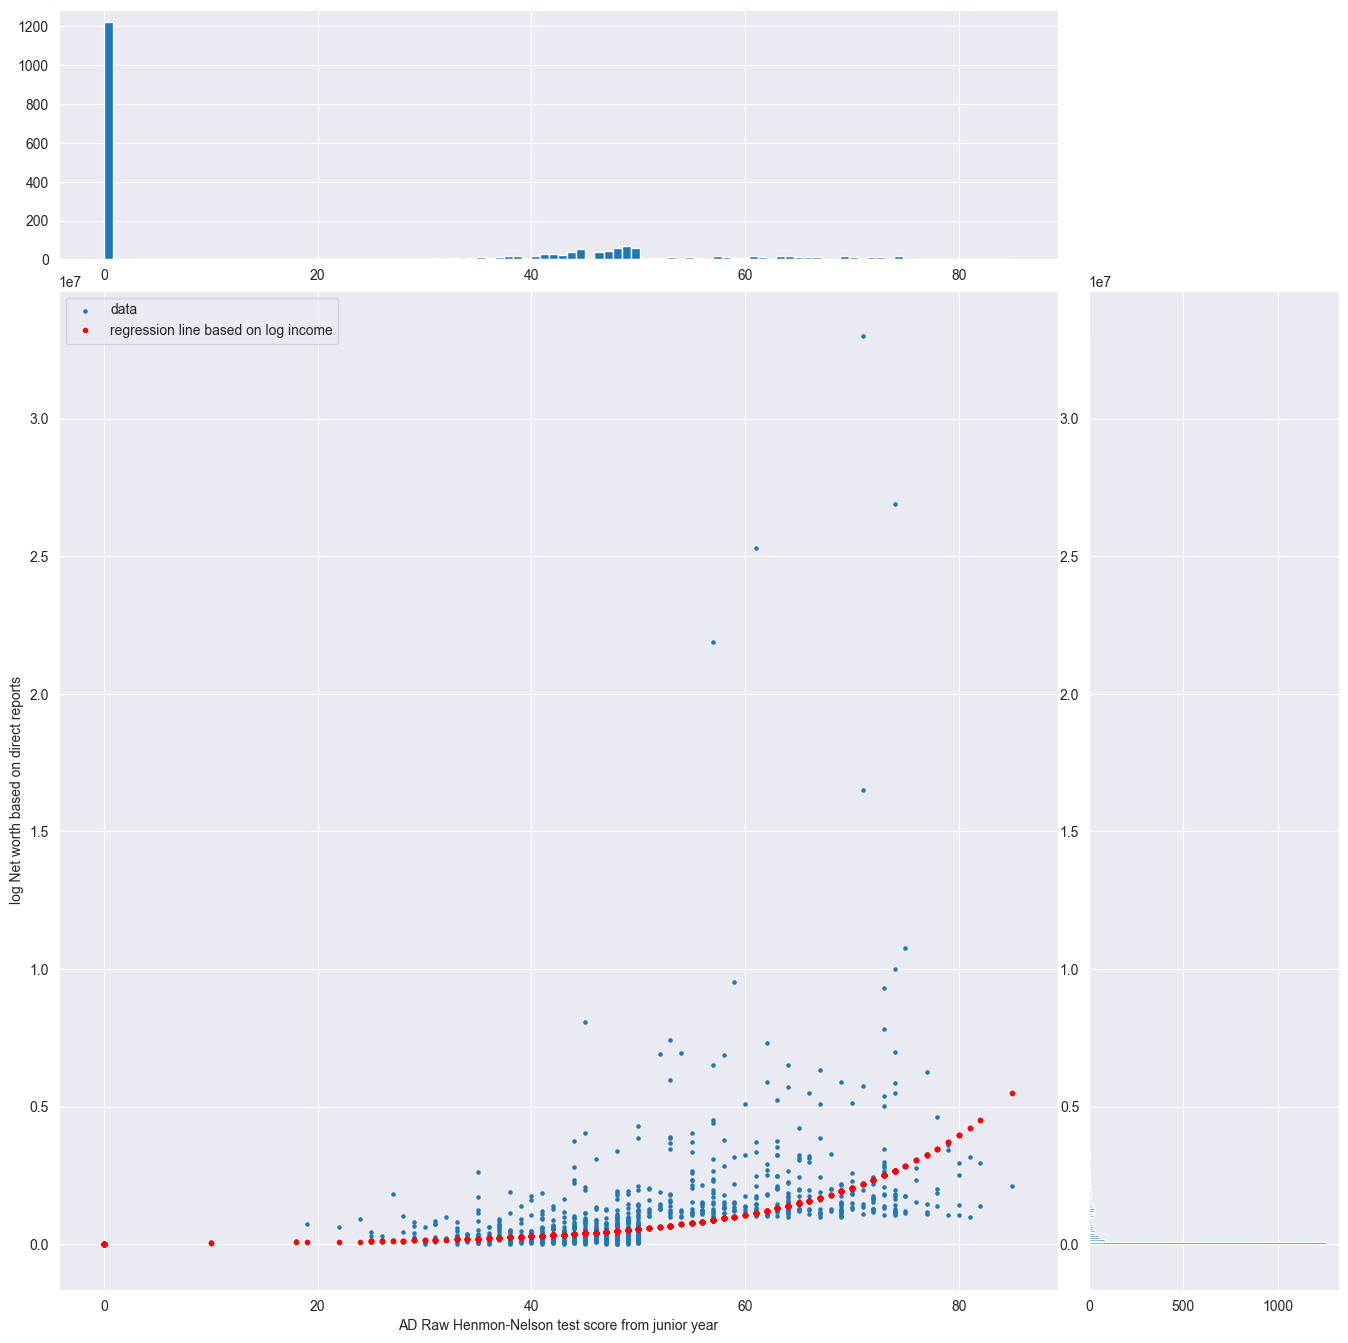

In [143]:
# Generate scatter-histogram plot
fig = plt.figure(figsize=(16, 16))
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)

ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)

ax.scatter(iq_income['ghnrs_j'], iq_income['z_ar025rpc'], s=5.0)
ax_histx.hist(iq_income['ghnrs_j'], bins=100)
ax_histy.hist(iq_income['z_ar025rpc'], bins=500, orientation='horizontal')

xlim = np.array(ax.get_xlim())
ax.plot(iq_income['ghnrs_j'], np.exp(y_pred), 'r.')
ax.set_xlim(xlim)
# ax.set_ylim([-5e5, 5e6])
ax.legend(['data', 'regression line based on log income'])
ax.set_xlabel("AD Raw Henmon-Nelson test score from junior year")
ax.set_ylabel("log Net worth based on direct reports")

In [147]:
from scipy.optimize import minimize
def exp_regression(x, y, w):
    def loss(coef):
        return 0.5*np.sum(w*(y - np.exp(coef[0]+ coef[1]*x))**2)
    
    def jac(coef):
        z = np.exp(coef[0]+ coef[1]*x)
        return np.array([-np.sum(w*(y - z)*z), -np.sum(w*x*(y - z)*z)])
    res = minimize(loss, [1e-5, 1e-5])
    return res

In [148]:
y = iq_income['z_ar025rpc'].values
x = iq_income['ghnrs_j'].values
w = iq_income['weight'].values

In [149]:
res = exp_regression(x, y, w)

C:\Users\soars\AppData\Local\Temp\ipykernel_34384\1273504.py:4: RuntimeWarning: overflow encountered in exp
  return 0.5*np.sum(w*(y - np.exp(coef[0]+ coef[1]*x))**2)
C:\Users\soars\anaconda3\envs\research_py310\lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
C:\Users\soars\AppData\Local\Temp\ipykernel_34384\1273504.py:4: RuntimeWarning: overflow encountered in exp
  return 0.5*np.sum(w*(y - np.exp(coef[0]+ coef[1]*x))**2)
C:\Users\soars\AppData\Local\Temp\ipykernel_34384\1273504.py:4: RuntimeWarning: overflow encountered in square
  return 0.5*np.sum(w*(y - np.exp(coef[0]+ coef[1]*x))**2)


In [150]:
res.x

array([0.00324542, 0.19048501])

In [151]:
res.success

False

In [152]:
y_max

33000000.0

Text(0, 0.5, 'log Net worth based on direct reports')

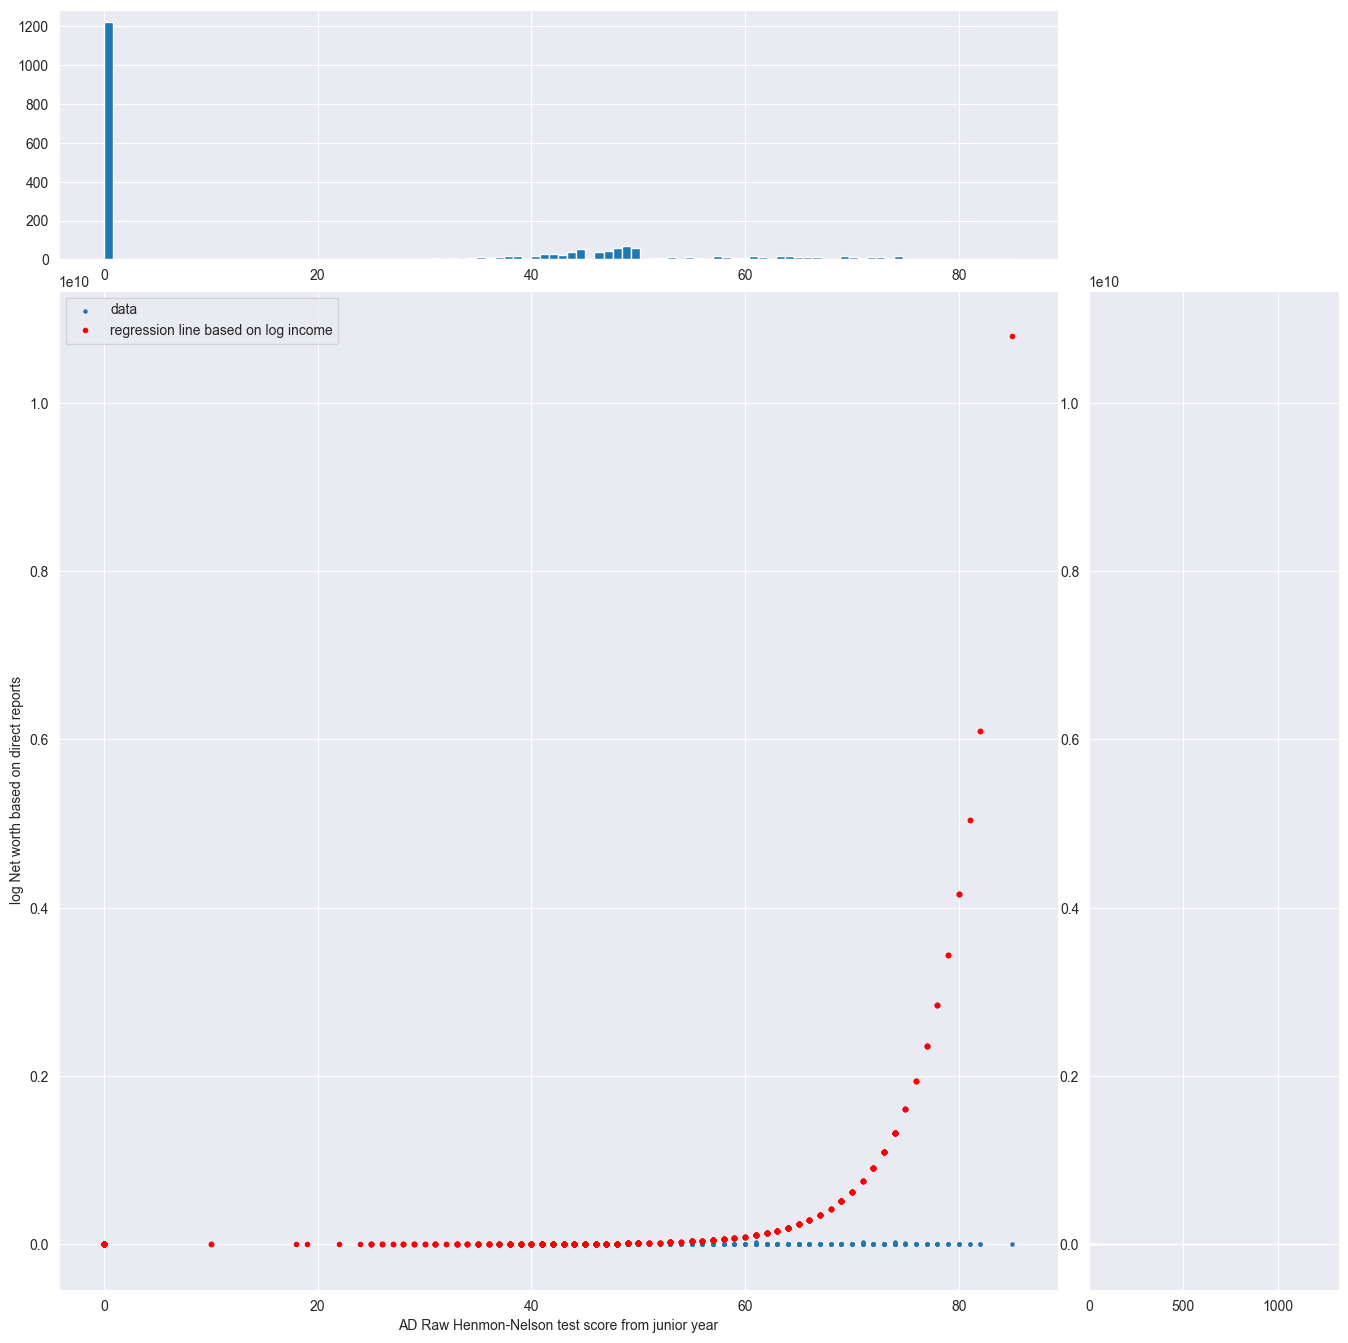

In [153]:
# Generate scatter-histogram plot
fig = plt.figure(figsize=(16, 16))
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)

ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)

ax.scatter(iq_income['ghnrs_j'], iq_income['z_ar025rpc'], s=5.0)
ax_histx.hist(iq_income['ghnrs_j'], bins=100)
ax_histy.hist(iq_income['z_ar025rpc'], bins=500, orientation='horizontal')

xlim = np.array(ax.get_xlim())
ax.plot(iq_income['ghnrs_j'], 1000*np.exp(res.x[0] + res.x[1]*iq_income['ghnrs_j']), 'r.')
ax.set_xlim(xlim)
# ax.set_ylim([-5e5, 5e6])
ax.legend(['data', 'regression line based on log income'])
ax.set_xlabel("AD Raw Henmon-Nelson test score from junior year")
ax.set_ylabel("log Net worth based on direct reports")